# Importing Data

## Loading and Displaying DataFrame



Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
import warnings
warnings.filterwarnings("ignore")

Reading the CSV file into a dataFrame and displaying the first few rows of the DataFrame to examine its structure and contents

In [2]:
df = pd.read_csv('imputed_dataset.csv')
pd.set_option('display.max_columns', None)
df.head()

,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_glucose_max,h1_glucose_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
0,118.0,68.0,22.732803,0.0,Caucasian,M,180.3,Floor,Floor,92.0,admit,CTICU,0.541667,73.900000,2.300000,113.0,502.01,0.0,0.0,0.400000,31.000000,2.510000,3.000000,6.000000,0.000000,4.000000,168.000000,118.0,27.400000,0.0,40.0,36.0,134.000000,39.3,1801.043127,0.0,14.100000,46.000000,32.000000,68.0,37.0,68.0,37.0,119.0,72.0,66.000000,40.000000,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,122.000000,64.000000,131.0,73.0,131.0,73.0,39.9,37.2,68.0,63.0,68.000000,63.000000,119.0,108.0,86.0,85.0,86.000000,85.000000,26.000000,18.000000,100.0,74.0,131.0,115.0,131.000000,115.000000,39.500000,37.500000,2.300000,2.300000,0.400000,0.400000,31.000000,30.000000,8.500000,7.400000,2.510000,2.2300,168.000000,109.000000,19.000000,15.000000,8.900000,8.900000,27.400000,27.400000,1.577705,1.463409,1.300000,1.000000,233.000000,233.000000,4.00000,3.400000,136.00000,134.000000,14.100000,14.100000,167.706416,158.911946,45.342289,38.535859,7.387684,7.322895,165.00941,102.95895,287.606087,224.007564,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,81.0,77.0,27.421875,0.0,Caucasian,F,160.0,Floor,Floor,90.0,admit,Med-Surg ICU,0.927778,70.200000,2.886148,108.0,203.01,0.0,0.0,1.201226,9.000000,0.560000,1.000000,3.000000,0.000000,1.000000,145.000000,120.0,36.900000,0.0,46.0,33.0,145.000000,35.1,1801.043127,1.0,12.700000,79.262762,46.970187,95.0,31.0,95.0,31.0,118.0,72.0,114.434689,62.211563,120.0,38.0,120.0,38.0,32.0,12.0,100.0,70.0,153.286032,93.636423,159.0,67.0,159.0,67.0,36.3,35.1,61.0,48.0,61.000000,48.000000,114.0,100.0,85.0,57.0,85.000000,57.000000,31.000000,28.000000,95.0,70.0,95.0,71.0,95.000000,71.000000,36.300000,36.300000,1.600000,1.600000,0.500000,0.500000,11.000000,9.000000,8.600000,8.000000,0.710000,0.5600,145.000000,128.000000,27.000000,26.000000,11.300000,11.100000,36.900000,36.100000,1.300000,1.300000,3.500000,3.500000,557.000000,487.000000,4.20000,3.800000,145.00000,145.000000,23.300000,12.700000,145.000000,143.000000

Checking the dimensions of the dataframe

In [3]:
df.shape

(130081, 131)

Re-evaluating for missing values

In [4]:
column_missing_info = []
for col in df.columns:
  if(df[col].isnull().any()):
    column_missing_info.append({
        'Column': col,
        'Data Type': df[col].dtype,
        'Null values count': df[col].isnull().sum(),
        '% of missing data': ((df[col].isnull().sum())/len(df))*100
    })

if column_missing_info:
  column_info_df = pd.DataFrame(column_missing_info)
  display(HTML(column_info_df.sort_values(by=["Data Type", "Null values count"]).to_html()))
else:
  print('No missing values!')

No missing values!


# Data Transformation

Dropping 'hospital_id', 'icu_id' columns as they didn't have any considerable correlation with the target variable

In [5]:
df = df.drop(columns=['hospital_id', 'icu_id'])
df.head()

,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_stay_type,icu_type,pre_icu_los_days,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_glucose_max,h1_glucose_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
0,68.0,22.732803,0.0,Caucasian,M,180.3,Floor,Floor,admit,CTICU,0.541667,73.900000,2.300000,113.0,502.01,0.0,0.0,0.400000,31.000000,2.510000,3.000000,6.000000,0.000000,4.000000,168.000000,118.0,27.400000,0.0,40.0,36.0,134.000000,39.3,1801.043127,0.0,14.100000,46.000000,32.000000,68.0,37.0,68.0,37.0,119.0,72.0,66.000000,40.000000,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,122.000000,64.000000,131.0,73.0,131.0,73.0,39.9,37.2,68.0,63.0,68.000000,63.000000,119.0,108.0,86.0,85.0,86.000000,85.000000,26.000000,18.000000,100.0,74.0,131.0,115.0,131.000000,115.000000,39.500000,37.500000,2.300000,2.300000,0.400000,0.400000,31.000000,30.000000,8.500000,7.400000,2.510000,2.2300,168.000000,109.000000,19.000000,15.000000,8.900000,8.900000,27.400000,27.400000,1.577705,1.463409,1.300000,1.000000,233.000000,233.000000,4.00000,3.400000,136.00000,134.000000,14.100000,14.100000,167.706416,158.911946,45.342289,38.535859,7.387684,7.322895,165.00941,102.95895,287.606087,224.007564,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,77.0,27.421875,0.0,Caucasian,F,160.0,Floor,Floor,admit,Med-Surg ICU,0.927778,70.200000,2.886148,108.0,203.01,0.0,0.0,1.201226,9.000000,0.560000,1.000000,3.000000,0.000000,1.000000,145.000000,120.0,36.900000,0.0,46.0,33.0,145.000000,35.1,1801.043127,1.0,12.700000,79.262762,46.970187,95.0,31.0,95.0,31.0,118.0,72.0,114.434689,62.211563,120.0,38.0,120.0,38.0,32.0,12.0,100.0,70.0,153.286032,93.636423,159.0,67.0,159.0,67.0,36.3,35.1,61.0,48.0,61.000000,48.000000,114.0,100.0,85.0,57.0,85.000000,57.000000,31.000000,28.000000,95.0,70.0,95.0,71.0,95.000000,71.000000,36.300000,36.300000,1.600000,1.600000,0.500000,0.500000,11.000000,9.000000,8.600000,8.000000,0.710000,0.5600,145.000000,128.000000,27.000000,26.000000,11.300000,11.100000,36.900000,36.100000,1.300000,1.300000,3.500000,3.500000,557.000000,487.000000,4.20000,3.800000,145.00000,145.000000,23.300000,12.700000,145.000000,143.000000,37.000000,37.000000,7.450000,7.450000,5

Separating and Storing numerical and categorical columns

In [6]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

Taking copy of orginal dataframe before making any transformations

In [7]:
df_original = df.copy(deep=True)

## Categorical encoding

Performing one-hot encoding on categorical variables and assigning the new encoded columns to the dataframe

In [8]:
discret_df = pd.get_dummies(df[categorical_cols], drop_first = True)
df = pd.concat([df, discret_df], axis=1)
df.drop(categorical_cols, axis=1, inplace=True)
df.replace({True: 1, False: 0}, inplace=True)

display(HTML(df.head().to_html()))

,age,bmi,elective_surgery,height,pre_icu_los_days,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_glucose_max,h1_glucose_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown,gender_M,hospital_admit_source_Chest Pain Center,hospital_admit_source_Direct Admit,hospital_admit_source_Emergency Department,hospital_admit_source_Floor,hospital_admit_source_ICU,hospital_admit_source_ICU to SDU,hospital_admit_source_Observation,hospital_admit_source_Operating Room,hospital_admit_source_Other,hospital_admit_source_Other Hospital,hospital_admit_source_Other ICU,hospital_admit_source_PACU,hospital_admit_source_Recovery Room,hospital_admit_source_Step-Down Unit (SDU),icu_admit_source_Floor,icu_admit_source_Operating Room / Recovery,icu_admit_source_Other Hospital,icu_admit_source_Other ICU,icu_stay_type_readmit,icu_stay_type_transfer,icu_type_CSICU,icu_type_CTICU,icu_type_Cardiac ICU,icu_type_MICU,icu_type_Med-Surg ICU,icu_type_Neuro ICU,icu_type_SICU
0,68.0,22.732803,0.0,180.3,0.541667,73.900000,2.300000,113.0,502.01,0.0,0.0,0.400000,31.000000,2.510000,3.000000,6.000000,0.000000,4.000000,168.000000,118.0,27.400000,0.0,40.0,36.0,134.000000,39.3,1801.043127,0.0,14.100000,46.000000,32.000000,68.0,37.0,68.0,37.0,119.0,72.0,66.000000,40.000000,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,122.000000,64.000000,131.0,73.0,131.0,73.0,39.9,37.2,68.0,63.0,68.000000,63.000000,119.0,108.0,86.0,85.0,86.000000,85.000000,26.000000,18.000000,100.0,74.0,131.0,115.0,131.000000,115.000000,39.500000,37.500000,2.300000,2.300000,0.400000,0.400000,31.000000,30.000000,8.500000,7.400000,2.510000,2.2300,168.000000,109.000000,19.000000,15.000000,8.900000,8.900000,27.400000,27.400000,1.577705,1.463409,1.300000,1.000000,233.000000,233.000000,4.00000,3.400000,136.00000,134.000000,14.100000,14.100000,167.706416,158.911946,45.342289,38.535859,7.387684,7.322895,165.00941,102.95895,287.606087,224.007564,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1,77.0,27.421875,0.0,160.0,0.927778,70.200000,2.886148,108.0,203.01,0.0,0.0,1.201226,9.000000,0.560

Separating numeric columns from binary columns, so that standardization can be applied to numeric columns only

In [9]:
binary_columns = [x for x in df.columns if (df[x].nunique() == 2 and set(df[x].unique()) == {0, 1})]
numeric_cols = [x for x in df.columns if x not in binary_columns]

## Performing Data Normalization

Performing Data Normalization to ensure that all numerical features in the dataset have a similar scale

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[numeric_cols] = pd.DataFrame(scaler.fit_transform(df[numeric_cols]), columns=numeric_cols)
display(HTML(df.head().to_html()))

,age,bmi,elective_surgery,height,pre_icu_los_days,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_glucose_max,h1_glucose_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown,gender_M,hospital_admit_source_Chest Pain Center,hospital_admit_source_Direct Admit,hospital_admit_source_Emergency Department,hospital_admit_source_Floor,hospital_admit_source_ICU,hospital_admit_source_ICU to SDU,hospital_admit_source_Observation,hospital_admit_source_Operating Room,hospital_admit_source_Other,hospital_admit_source_Other Hospital,hospital_admit_source_Other ICU,hospital_admit_source_PACU,hospital_admit_source_Recovery Room,hospital_admit_source_Step-Down Unit (SDU),icu_admit_source_Floor,icu_admit_source_Operating Room / Recovery,icu_admit_source_Other Hospital,icu_admit_source_Other ICU,icu_stay_type_readmit,icu_stay_type_transfer,icu_type_CSICU,icu_type_CTICU,icu_type_Cardiac ICU,icu_type_MICU,icu_type_Med-Surg ICU,icu_type_Neuro ICU,icu_type_SICU
0,0.712329,0.148912,0.0,0.738140,0.004501,0.239484,0.323529,0.057971,0.228074,0.0,0.0,0.004992,0.219512,0.203125,0.666667,1.000000,0.000000,0.750000,0.230481,0.594595,0.318182,0.0,0.00000,0.571429,0.414634,0.947368,0.206621,0.0,0.293987,0.062500,0.321429,0.184874,0.311688,0.184874,0.311688,0.512605,0.411429,0.098592,0.324786,0.233871,0.266667,0.239669,0.266667,0.256410,0.10,1.00,0.74,0.227679,0.333333,0.288732,0.268908,0.288732,0.268723,1.000000,0.898494,0.292453,0.450549,0.289720,0.445652,0.618644,0.666667,0.318966,0.500000,0.324561,0.500000,0.326531,0.095238,1.00,0.74,0.378378,0.439716,0.378378,0.436620,1.000000,0.718750,0.323529,0.352941,0.003333,0.003460,0.221311,0.245254,0.500000,0.395833,0.201486,0.200251,0.176580,0.298039,0.250000,0.250000,0.201923,0.315789,0.225080,0.333333,0.098848,0.107788,0.046392,0.040816,0.369176,0.397940,0.285714,0.294118,0.371429,0.472222,0.287433,0.330017,0.170910,0.186166,0.290953,0.332843,0.589344,0.648182,0.251082,0.178095,0.298467,0.330867,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1,0.835616,0.237435,0.0,0.390478,0.006697

# Model Training and Evaluation

Separating the target feature from the independent features for model training

In [11]:
y_feature = df['diabetes_mellitus']
x_features = df.drop('diabetes_mellitus',axis=1)

Split the dataset into training and testing sets

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_features, y_feature, test_size=0.2, random_state=42)

Balancing dataset using SMOTE to resolve Imbalace Issue

In [13]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
x_resampled, y_resampled = sm.fit_resample(x_train, y_train)

## Model 1 - K Nearest Neighbors

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
auc_list = []

for k in np.arange(7, 550, 50):
    # Creating the KNN classifier
    knn_clf = KNeighborsClassifier(
        n_neighbors=k,
        metric='manhattan',
        weights='distance',
        p=2,
        leaf_size=45
            
    )
    knn_clf.fit(x_resampled, y_resampled)

    # Evaluate the model on the testing set
    y_pred = knn_clf.predict(x_test)
    model_accuracy = accuracy_score(y_test, y_pred)
    model_precision = precision_score(y_test, y_pred, average='macro')
    model_recall = recall_score(y_test, y_pred, average='macro')
    model_f1 = f1_score(y_test, y_pred, average='macro')
    model_auc = roc_auc_score(y_test, y_pred)

    accuracy_list.append(model_accuracy)
    precision_list.append(model_precision)
    recall_list.append(model_recall)
    f1_list.append(model_f1)
    auc_list.append(model_auc)

    print(f'For K = {k}, Accuracy: {model_accuracy:.4f}, Precision: {model_precision:.4f}, Recall: {model_recall:.4f}, F1: {model_f1:.4f}, AUC: {model_auc:.4f}')

print('Model performance')
print("- Accuracy: {:.4f}".format(np.mean(accuracy_list)))
print("- Precision: {:.4f}".format(np.mean(precision_list)))
print("- Recall: {:.4f}".format(np.mean(recall_list)))
print("- F1-Score: {:.4f}".format(np.mean(f1_list)))
print("- AUC: {:.4f}".format(np.mean(auc_list)))

print('='*35)
print('\n')

For K = 7, Accuracy: 0.6021, Precision: 0.5912, Recall: 0.6338, F1: 0.5621, AUC: 0.6338
For K = 57, Accuracy: 0.5646, Precision: 0.6152, Recall: 0.6645, F1: 0.5466, AUC: 0.6645
For K = 107, Accuracy: 0.5565, Precision: 0.6202, Recall: 0.6691, F1: 0.5418, AUC: 0.6691
For K = 157, Accuracy: 0.5516, Precision: 0.6231, Recall: 0.6713, F1: 0.5386, AUC: 0.6713
For K = 207, Accuracy: 0.5458, Precision: 0.6232, Recall: 0.6699, F1: 0.5340, AUC: 0.6699
For K = 257, Accuracy: 0.5417, Precision: 0.6228, Recall: 0.6685, F1: 0.5307, AUC: 0.6685
For K = 307, Accuracy: 0.5367, Precision: 0.6220, Recall: 0.6662, F1: 0.5264, AUC: 0.6662
For K = 357, Accuracy: 0.5347, Precision: 0.6225, Recall: 0.6661, F1: 0.5248, AUC: 0.6661
For K = 407, Accuracy: 0.5322, Precision: 0.6225, Recall: 0.6654, F1: 0.5228, AUC: 0.6654
For K = 457, Accuracy: 0.5308, Precision: 0.6232, Recall: 0.6658, F1: 0.5218, AUC: 0.6658
For K = 507, Accuracy: 0.5288, Precision: 0.6225, Recall: 0.6644, F1: 0.5200, AUC: 0.6644
Model perform

# Model 2 & 3 - Logistic Regression & Decision Tree

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define logistic regression model
logistic_regression_model = LogisticRegression(
    penalty='l2',
    solver='newton-cg', 
    max_iter=250,
    dual=False,
    C=0.8,
    warm_start=True
)

# Train logistic regression model
logistic_regression_model.fit(x_resampled, y_resampled)

# Make predictions with logistic regression model
y_pred_lr = logistic_regression_model.predict(x_test)

# Calculate performance metrics for logistic regression model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, average='macro')
recall_lr = recall_score(y_test, y_pred_lr, average='macro')
f1_lr = f1_score(y_test, y_pred_lr, average='macro')
auc_lr = roc_auc_score(y_test, y_pred_lr)

# Print performance metrics for logistic regression model
print("Logistic Regression Model Performance:")
print("- Accuracy: {:.4f}".format(accuracy_lr))
print("- Precision: {:.4f}".format(precision_lr))
print("- Recall: {:.4f}".format(recall_lr))
print("- F1-Score: {:.4f}".format(f1_lr))
print("- AUC: {:.4f}".format(auc_lr))
print('='*35)
print('\n')

Logistic Regression Model Performance:
- Accuracy: 0.7667
- Precision: 0.6890
- Recall: 0.7412
- F1-Score: 0.7027
- AUC: 0.7412




The above logistic regression model has an accuracy of 76.67%. Hence, the Logistic Regression Model is quite an impressive model with reasonable prediction accuracy compared to KNN model.

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define decision tree model
decision_tree_model = DecisionTreeClassifier(
    criterion='entropy', 
    max_depth=4, 
    max_leaf_nodes=5, 
    ccp_alpha=0.0,
    min_samples_split=2, 
    min_impurity_decrease=0.02
)

# Train decision tree model
decision_tree_model.fit(x_resampled, y_resampled)

# Make predictions with decision tree model
y_pred_dt = decision_tree_model.predict(x_test)

# Calculate performance metrics for decision tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='macro')
recall_dt = recall_score(y_test, y_pred_dt, average='macro')
f1_dt = f1_score(y_test, y_pred_dt, average='macro')
auc_dt = roc_auc_score(y_test, y_pred_dt)

# Print performance metrics for decision tree model
print("Decision Tree Model Performance:")
print("- Accuracy: {:.4f}".format(accuracy_dt))
print("- Precision: {:.4f}".format(precision_dt))
print("- Recall: {:.4f}".format(recall_dt))
print("- F1-Score: {:.4f}".format(f1_dt))
print("- AUC: {:.4f}".format(auc_dt))
print('='*35)
print('\n')

Decision Tree Model Performance:
- Accuracy: 0.7479
- Precision: 0.6715
- Recall: 0.7227
- F1-Score: 0.6828
- AUC: 0.7227




The Decision Tree model also almost has similar performance as the logistic regression model. Comparatively, there are minor tradeoffs between the AUC and Accuracy values. Overall, the Decision Tree model also has an impressive performance.

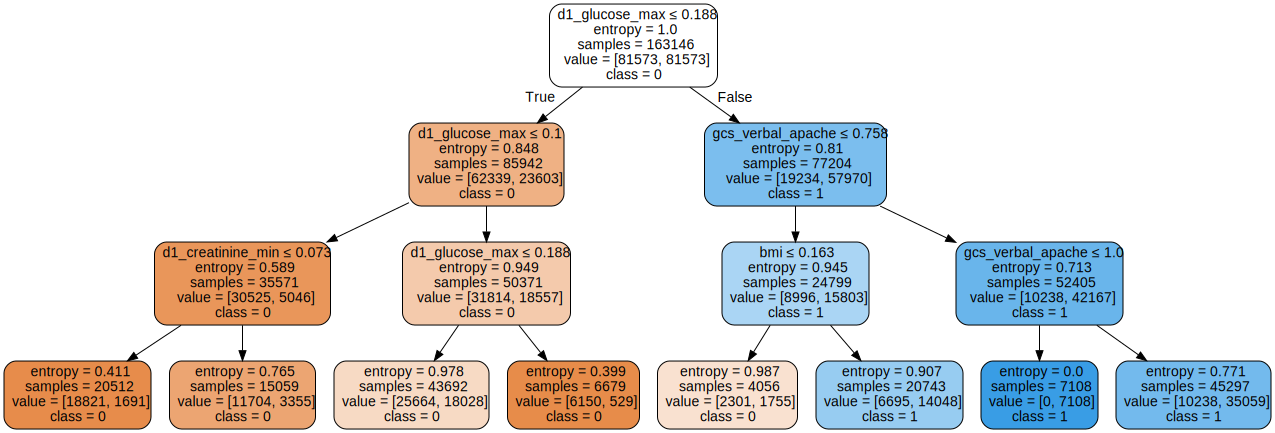

In [16]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

# Define decision tree model
decision_tree_model = DecisionTreeClassifier(
    criterion='entropy', 
    max_depth=3, 
)

# Train decision tree model
decision_tree_model.fit(x_resampled, y_resampled)

# Export the decision tree as DOT data
dot_data = export_graphviz(decision_tree_model, out_file=None, 
                           feature_names=x_resampled.columns,
                           class_names=["0", "1"],  # Replace with your class labels
                           filled=True, rounded=True, special_characters=True)

# To Visualize the decision tree
graph = graphviz.Source(dot_data)
graph.view()  

graph

The following assessments can be made from the decision tree as above. If the maximum glucose level (d1_glucose_max) is less than or equal to 0.188, the data point is classified as class 0. For data points with max glucose above 0.188, if d1_creatinine_min is less than /equal to 0.73, they are classified as class 0. Each branch of the tree ends in a leaf node, where all data points belong to the class 0 or 1. Entropy values at each node indicate how well-separated the data is (0 = perfectly classified).